In [1]:
%matplotlib inline

# Quality Checks: Behavioural Response Rate and Head motion 

This notebook includes code and instructions to re-generate figures included in the Data Descriptor article for the CNeuroMod-THINGS dataset. These figures feature distributions of behavioural response rates, as well as framewise displacement (FD, in mm) per run (averaged; middle) and per frame (right) as an indicator of head motion. 

The code below generates the following three panels from **Fig. 2c**:

* **left**, distributions of response rate per run (i.e., proportion of trials with a recorded button press)
* **middle**, distributions of framewise displacement (in mm) averaged per run
* **right**, distributions of framewise displacement (in mm) plotted for every frame



---

# 0 | Installation

### 0.1 | Install required Python libraries
To run this Notebook and re-create figures, you need to install the following Python libraries (e.g., inside a virtual environment). 

```shell
jupyter==1.0.0
numpy==1.24.4
pandas==1.3.5
matplotlib==3.7.5
seaborn==0.11.2
```
---

### 0.2 | Install the CNeuroMod-THINGS dataset

To generate figures, you need to download a few files from the CNeuroMod-THINGS dataset. 

Use the DataLad software (version > 1.0.0, https://www.datalad.org/) to clone the `cneuromod-things` repository. 
DataLad is a versionning tool to manage large data structures organized in git repositories available for Linux, OSX and Windows. 

Note: the command below installs **symbolic links without downloading heavy files** onto your local machine.

```bash
datalad clone git@github.com:courtois-neuromod/cneuromod-things.git
```
---


### 0.3 | Pull the data files needed to generate figures

Before you can run this Notebook, you need to **download a few input files** onto your local machine. 

Inside the newly cloned `cneuromod-things` repository, first navigate to `cneuromod-things/THINGS/behaviour`, which is a submodule inside the main repository. Upon installation, the `behaviour` submodule will appear empty. 

```bash
cd cneuromod-things/THINGS/behaviour
ls
```

Use DataLad to download the `behaviour` submodule's symbolic links (**no large files will be pulled**).

```bash
datalad get *
ls
```

Then, use DataLad again to download only the files you need onto your local machine.

```bash
datalad get sub-*/beh/sub-*_task-things_desc-perTrial_annotation.tsv
```

Now, navigate to `cneuromod-things/THINGS/glmsingle`, another submodule inside the main repository. Again, the `glmsingle` submodule should appear empty. 

```bash
cd ../behaviour
ls
```

Use DataLad to download the `glmsingle` submodule's symbolic links.

```bash
datalad get *
ls
```

Then, use DataLad to download the following files locally.

```bash
datalad get sub-*/qc/sub-*_task-things_headmotion.tsv
```


---
### 0.4 | Launch the Jupyter Notebook

Inside `cneuromod-things`, navigate to the tutorial section, and open the current Jupyter Notebook (qc_motion_response.ipynb)
```bash
cd cneuromod-things/datapaper/notebooks
jupyter notebook
```


---
# 1 | Import Python libraries

Run the code below to import Python libraries.

In [2]:
import os, glob
from pathlib import Path

import numpy as np
from numpy import nan as NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
print('seaborn version: ', sns.__version__)

numpy version:  1.24.4
pandas version:  1.3.5
matplotlib version:  3.7.5
seaborn version:  0.11.2


---
# 2 | Response Rate (Figure 2c, left panel)

**Fig. 2c (left)** features the response rate per run for each subject.

**Input files**: 
* cneuromod-things/THINGS/behaviour/sub-{sub_num}/beh/sub-{sub_num}_task-things_desc-perTrial_annotation.tsv

### 2.1 | Set paths and variables


In [3]:
# set save_fig to True to export a .png file of Fig. 2c, left panel
save_fig = False

# Resolve relative input and output paths
beh_file_path = Path("../../THINGS/behaviour").resolve()
fig_save_path = Path("../figures").resolve()


### 2.2 | Run the code below to generate Fig. 2c (left)


[]

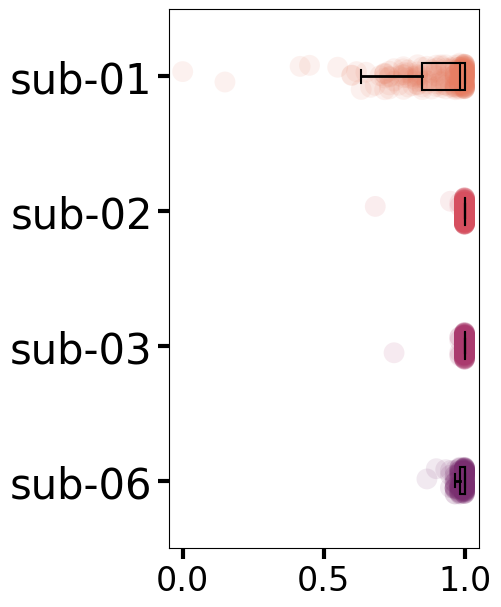

In [4]:

# Compute response rate per run for each subject
flist = sorted(glob.glob(f"{beh_file_path}/sub-*/beh/sub-*_task-things_desc-perTrial_annotation.tsv"))

col_names = ['subject_id', 'session_id', 'run_id', 'response_rate']
all_sub_rr_df = pd.DataFrame(columns=col_names) 

for file in flist:
    sub_num = os.path.basename(file).split('_')[0][-2:]
    sub_df = pd.read_csv(file, sep = '\t', low_memory=False)
    
    for sess in np.unique(sub_df['session_id']).tolist():
        df_ses = sub_df[sub_df['session_id'] == sess]
        runs = [x for x in np.unique(df_ses['run_id']).tolist()]
        for r in runs:
            df_run = df_ses[df_ses['run_id'] == r]#.dropna()
            
            resp_rate_r = 1 - (np.sum(df_run['response_txt'].isna()) / df_run.shape[0])
            
            run_entry = [f'sub-{sub_num}', sess, r, resp_rate_r]
            all_sub_rr_df = all_sub_rr_df.append(pd.Series(run_entry, index=col_names), ignore_index=True)


# Make response rate figure
SMALL_SIZE = 8
MEDIUM_SIZE = 24
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


df = all_sub_rr_df

f, ax = plt.subplots(figsize=(4, 7))

dy="subject_id"; dx="response_rate"; ort="h"; 
pal = sns.color_palette("flare", 4)


ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, alpha=0.10, s=15, jitter = 1, zorder = 0, orient = ort)

ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .20, zorder = 10, 
               showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
               showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},
               saturation = 1, orient = ort)

ax.tick_params(width=3, size=8)

plt.xticks([0.0, 0.5, 1.0])
plt.xlabel('')
plt.ylabel('')

if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_response_rate_cloud.png", dpi=600, bbox_inches='tight')
plt.plot()


---
# 3 | Framewise Displacement per frame (Figure 2c, right panel)

**Fig. 2c (right)** features the distribution of framewise displacement per frame for each subject.

**Input files**: 
* cneuromod-things/THINGS/glmsingle/sub-{sub_num}/qc/sub-{sub_num}_task-things_headmotion.tsv

### 3.1 | Set paths and variables


In [5]:
# set to True to export .png file of Fig 2c (right panel)
save_fig = False

# Resolve relative input and output paths
mot_file_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()


### 3.2 | Run the code below to generate Fig. 2c (right)


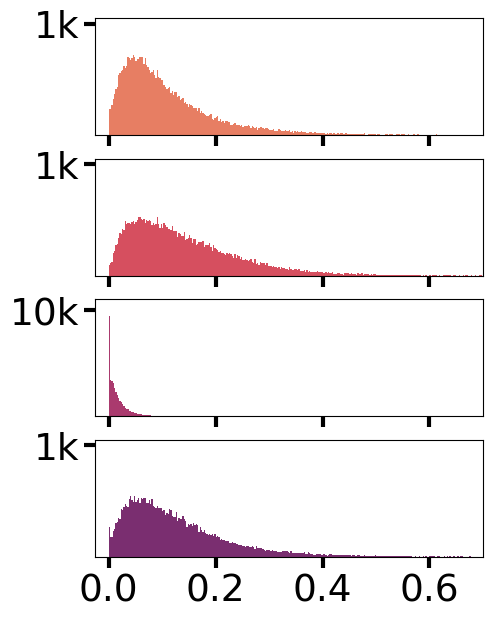

In [6]:
# FD per frame plot (right panel)

SMALL_SIZE = 8
MEDIUM_SIZE = 27
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(4, 1, figsize=(5, 7))

sub_list = ['01', '02', '03', '06']
colors = [
    (0.90732341, 0.4939774, 0.38990532),
    (0.83765537, 0.30784814, 0.3723105),
    (0.66635279, 0.22717328, 0.43008427),
    (0.47936222, 0.18006056, 0.43733022),
]

for i in range(len(sub_list)):
    sub_num = sub_list[i]
    sub_df = pd.read_csv(
        f"{mot_file_path}/sub-{sub_num}/qc/sub-{sub_num}_task-things_headmotion.tsv",
        sep = '\t',
    ).dropna()
    raw_data = sub_df['framewise_displacement'].to_numpy() 
        
    axes[i].hist(sub_df['framewise_displacement'], bins=np.arange(0, 0.7, 0.0025), color=colors[i])
    axes[i].set_xlim((-0.025, 0.7))
    axes[i].set_xticks(ticks=[0.0, 0.2, 0.4, 0.6])
    axes[i].tick_params(width=3, size=8)
    
    if i == 2:
        axes[i].set_ylim((0, 11000))
        axes[i].set_yticks(ticks=[10000])
        axes[i].set_yticklabels(['10k'])
    else:
        axes[i].set_ylim((0, 1050))
        axes[i].set_yticks(ticks=[1000])
        axes[i].set_yticklabels(['1k'])
        
    if i == 3:
        axes[i].set_xticklabels([0.0, 0.2, 0.4, 0.6])
        axes[i].set_xlabel('')
    else:
        axes[i].set_xticklabels([])
        axes[i].set_xlabel('')
            
if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_fwd_distribution_perFrame.png", dpi=600, bbox_inches='tight')
plt.show()


---
# 4 | Average Framewise Displacement per run (Figure 2c, middle panel)

**Fig. 2c (middle)** features the distribution of average framewise displacement per run for each subject.

**Input files**: 
* cneuromod-things/THINGS/glmsingle/sub-{sub_num}/qc/sub-{sub_num}_task-things_headmotion.tsv

### 4.1 | Set paths and variables


In [7]:
# set to True to export .png file of Fig 2c (middle panel)
save_fig = False

# Resolve relative input and output paths
mot_file_path = Path("../../THINGS/glmsingle").resolve()
fig_save_path = Path("../figures").resolve()


### 4.2 | Run the code below to generate Fig. 2c (middle)


[]

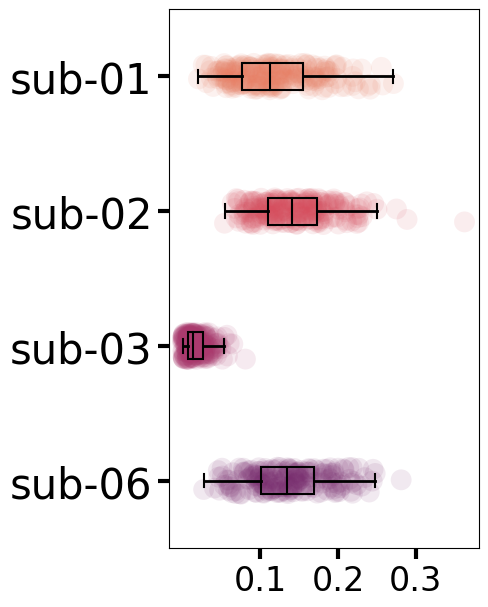

In [8]:
# Mean FWD per run plot (middle panel)

# Average motion metrics per run for each subject

flist = sorted(glob.glob(f"{mot_file_path}/sub-*/qc/sub-*_task-things_headmotion.tsv"))

ids = ['subject_id', 'session_id', 'run_id']
col_names = ['framewise_displacement', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
all_sub_means_df = pd.DataFrame(columns=ids + ['mean_framewise_displacement']) 

for file in flist:
    sub_num = os.path.basename(file).split('_')[0][-2:]
    sub_df = pd.read_csv(file, sep = '\t')

    sub_df.insert(loc=0, column='subject_id', value=int(sub_num), allow_duplicates=True)
    
    for sess in np.unique(sub_df['session_id']).tolist():
        df_ses = sub_df[sub_df['session_id'] == sess]
        runs = [x for x in np.unique(df_ses['run_id']).tolist()]
        for r in runs:
            df_run = df_ses[df_ses['run_id'] == r].dropna()
            run_entry = [f'sub-{sub_num}', sess, r, df_run['framewise_displacement'].mean()]
            all_sub_means_df = all_sub_means_df.append(pd.Series(run_entry, index=ids + ['mean_framewise_displacement']), ignore_index=True)


# Make figure

SMALL_SIZE = 8
MEDIUM_SIZE = 24
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


df = all_sub_means_df

f, ax = plt.subplots(figsize=(4, 7))

dy="subject_id"; dx="mean_framewise_displacement"; ort="h"; 
pal = sns.color_palette("flare", 4)

ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                 size = 3, alpha=0.10, s=15, jitter = 1, zorder = 0, orient = ort)
    
ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .20, zorder = 10, 
               showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
               showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},
               saturation = 1, orient = ort)

ax.tick_params(width=3, size=8)

plt.xticks([0.1, 0.2, 0.3])
plt.xlabel('')
plt.ylabel('')

if save_fig:
    plt.savefig(f"{fig_save_path}/Fig2C_fd distribution_perRun.png", dpi=600, bbox_inches='tight')
plt.plot()
